# Comparative Analytics

## Game-Level Engagement Metrics
Which games attract the most players, keep them engaged, and earn the highest satisfaction?

In [6]:
import pandas as pd
steam_ds = pd.read_csv("steam_games_cleaned.csv")

In [7]:
steam_ds

,review,hours_played,helpful,funny,recommendation,date,game_name,username,playtime
0,the game itself is also super fun the pvp and ...,39.9,1152,13,1,2025-09-14,"Warhammer 40,000: Space Marine 2",Sentinowl\r\n224 products in account,Moderate
1,never cared much about warhammer until this ga...,91.5,712,116,1,2025-09-13,"Warhammer 40,000: Space Marine 2",userpig\r\n248 products in account,Moderate
2,a salute to all the fallen battle brothers who...,43.3,492,33,1,2025-09-14,"Warhammer 40,000: Space Marine 2",Imparat0r\r\n112 products in account,Moderate
3,this game feels like it was made in the mid 20...,16.8,661,15,1,2025-09-14,"Warhammer 40,000: Space Marine 2",Fattest_falcon,Moderate
4,reminds me of something ive lost a genuine gam...,24.0,557,4,1,2025-09-12,"Warhammer 40,000: Space Marine 2",Jek\r\n410 products in account,Moderate
...,...,...,...,...,...,...,...,...,...
991563,2022 early access review loads of funinitially...,4.2,1,0,1,2022-08-04,Turbo Golf Racing,"Fatal Exit\r\n1,902 products in account",Casual
991564,2022 early access review great fun,8.5,1,0,1,2022-08-04,Turbo Golf Racing,cleybaR,Casual
991565,2022 early access review excellent pick up and...,83.3,2,0,1,2022-08-04,Turbo Golf Racing,Sim\r\n600 products in account,Moderate
991566,2022 early access review this game is so much ...,3.8,1,0,1,2022-08-04,Turbo Golf Racing,Fatboybadboy,Casual


In [8]:
game_stats = steam_ds.groupby('game_name').agg({'hours_played': 'mean', 'recommendation': 'mean', 'review': 'count'}).rename(columns={'review': 'review_count'})

In [9]:
game_stats.sort_values('review_count', ascending=False)

,hours_played,recommendation,review_count
game_name,,,
Arma 3,1975.602136,0.955090,5010
Age of Empires II (Retired),341.793214,0.974451,5010
Caves of Qud,199.204351,0.937924,5010
Human Fall Flat,45.343992,0.982236,5010
Palworld,98.728323,0.944311,5010
...,...,...,...
GP Bikes,190.996250,0.925000,240
MXGP - The Official Motocross Videogame,40.654615,0.815385,130
69 Balls,31.705000,0.941667,118


### Takeaways
- Engagement varies significantly across titles: some games attract large numbers of reviews but have relatively low average playtime, while others have smaller but highly committed player bases.
- Recommendation rates differ widely, revealing which games deliver consistently positive experiences.
- Combining review count, playtime, and sentiment provides a multi‑dimensional view of game performance, helping identify standout titles and potential problem areas.

## Playtime Categories (Casual vs Moderate vs Heavy)
Do heavier players behave differently from casual players?

In [10]:
category_compare = steam_ds.groupby('playtime').agg({'hours_played': 'mean', 'recommendation': 'mean', 'username': 'nunique'}).rename(columns={'username': 'unique_users'})

category_compare

,hours_played,recommendation,unique_users
playtime,,,
Casual,4.601503,0.624538,129552
Heavy,317.884253,0.838404,273759
Moderate,41.445694,0.854417,388695


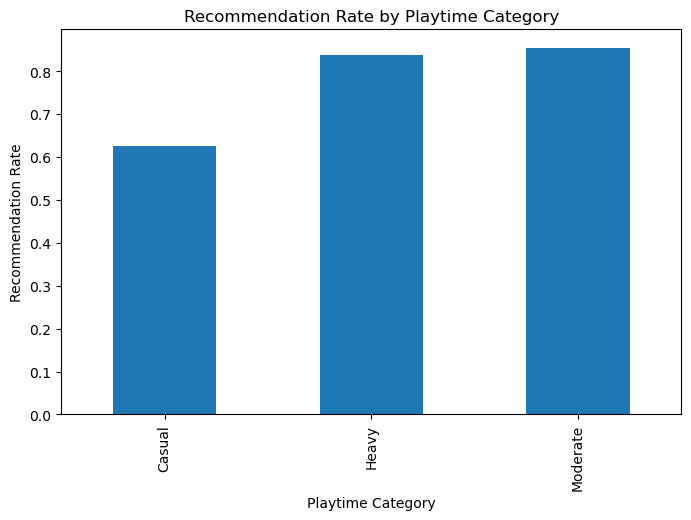

In [11]:
import matplotlib.pyplot as plt
category_compare['recommendation'].plot(kind='bar', figsize=(8,5))
plt.title('Recommendation Rate by Playtime Category')
plt.xlabel('Playtime Category')
plt.ylabel('Recommendation Rate')
plt.show()

### Takeaways
- Heavy players show higher recommendation rates, reinforcing the link between deeper engagement and satisfaction.
- Casual players tend to have lower playtime and lower recommendation rates, suggesting early‑stage churn or unmet expectations.
- The distribution of users across categories highlights the shape of the player base — typically many casual players and fewer heavy players, but heavy players contribute disproportionately to total engagement.

## Combined Insights
- Some games attract huge audiences but don’t retain them deeply.
- Others have smaller but highly engaged communities.
- Heavy players consistently show higher satisfaction, suggesting that deeper engagement correlates with positive sentiment.